## First attempt at loading data and running correlation

### if excel then pd.read_excel()
### if csv then pd.read_csv()

In [12]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [3]:
corrs1 = pd.read_excel('../../data/raw/Price Correlation.xlsx')

In [4]:
def fromXLSXtoDF(sheetNames_param, xlsxData_param):
    allDF = []
    for i in sheetNames_param:
        # print the sheet name (not necessary)
        print(i)
        # so read each sheet named "i", and just the first two columns 0 and 1
        df = pd.read_excel(xlsxData_param, sheet_name=i, usecols=[0, 1])
        # set the timestamp to the index
        df = df.set_index("Timestamp")
        # add the dataframe to the list of dataframes
        allDF.append(df)
    # concatenate across rows (axis=1), use the index as key)
    result = pd.concat(allDF, axis=1, join='outer')
    # change names of columns to the sheetnames
    result.columns = sheetNames
    return(result)

In [5]:
sheetNames = ["Soybean", "Soymeal", "Soyoil", "Corn", "DalianSBM", "DalianSBO", "BRL", "CNY"]
xlsxData = "../../data/raw/Price Correlation.xlsx"
myresults = fromXLSXtoDF(sheetNames, xlsxData)
print(myresults)

Soybean
Soymeal
Soyoil
Corn
DalianSBM
DalianSBO
BRL
CNY
            Soybean  Soymeal  Soyoil    Corn  DalianSBM  DalianSBO     BRL  \
Timestamp                                                                    
2012-12-20      NaN      NaN     NaN     NaN     1676.0    10858.0     NaN   
2012-12-21      NaN      NaN     NaN     NaN     1670.0    10884.0     NaN   
2012-12-24      NaN      NaN     NaN     NaN     1687.0    10940.0     NaN   
2012-12-25      NaN      NaN     NaN     NaN     1651.0    10886.0     NaN   
2012-12-26      NaN      NaN     NaN     NaN     1655.0    10872.0     NaN   
...             ...      ...     ...     ...        ...        ...     ...   
2020-06-18   876.00    295.2   28.87  335.50     2813.0     5668.0  5.3776   
2020-06-19   880.75    293.9   29.31  337.25     2808.0     5750.0  5.3105   
2020-06-22   879.25    293.2   29.22  333.00     2828.0     5790.0  5.2524   
2020-06-23   874.00    292.5   29.04  329.00     2831.0     5774.0  5.1542   
2020-06-

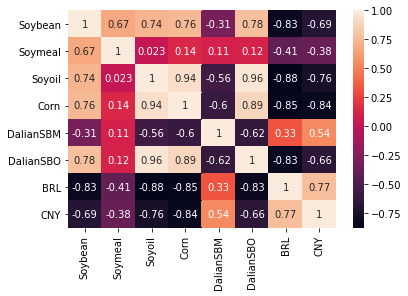

In [16]:
# plot with ugly colors
sns.heatmap(myresults.corr(), annot=True)
plt.show()

In [13]:
#to standardize data, needed to mitigate small values
def scaleDF(myDF):
    resultsStd = myDF.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    results_scaled = min_max_scaler.fit_transform(resultsStd)
    myresults_scaled = pd.DataFrame(results_scaled)
    # change names of columns to the sheetnames
    myresults_scaled.columns = myDF.columns
    print(myresults_scaled.head())
    return(myresults_scaled)

In [14]:
sheetNames = ["Soybean", "Soymeal", "Soyoil", "Corn", "DalianSBM", "DalianSBO", "BRL", "CNY"]
#sheetNames = ["Soybean", "Soymeal", "Soyoil"]
xlsxData = "../../data/raw/Price Correlation.xlsx"
myresults = fromXLSXtoDF(sheetNames, xlsxData)
res_scaled = scaleDF(myresults)

Soybean
Soymeal
Soyoil
Corn
DalianSBM
DalianSBO
BRL
CNY
   Soybean  Soymeal  Soyoil  Corn  DalianSBM  DalianSBO  BRL  CNY
0      NaN      NaN     NaN   NaN   0.072738   0.964767  NaN  NaN
1      NaN      NaN     NaN   NaN   0.069071   0.969257  NaN  NaN
2      NaN      NaN     NaN   NaN   0.079462   0.978929  NaN  NaN
3      NaN      NaN     NaN   NaN   0.057457   0.969603  NaN  NaN
4      NaN      NaN     NaN   NaN   0.059902   0.967185  NaN  NaN


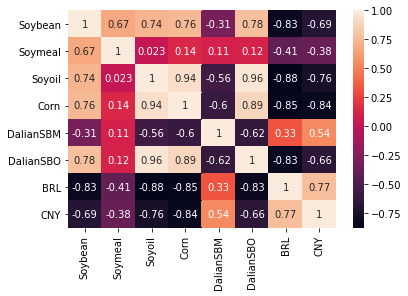

In [15]:
# plot with ugly colors
sns.heatmap(res_scaled.corr(), annot=True)
plt.show()

In [ ]:
sheetNames = ["Soybean", "Soymeal", "Corn"]
xlsxData = "../../data/raw/Price Correlation.xlsx"
myresults = fromXLSXtoDF(sheetNames, xlsxData)
res_scaled = scaleDF(myresults)

# plot with ugly colors
sns.heatmap(res_scaled.corr(), annot=True)
plt.show()

Soybean
Soymeal
Corn
